In [18]:
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.python.data.ops.dataset_ops import PrefetchDataset

In [19]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

train_dataset: PrefetchDataset = dataset['train']
test_dataset: PrefetchDataset = dataset['test']

In [20]:
data = tfds.as_dataframe(test_dataset, metadata)

In [21]:
import pandas as pd

In [22]:
class_names = [
    'Футболка / топ', "Шорты", "Свитер", "Платье",
    "Плащ", "Сандали", "Рубашка", "Кроссовок", "Сумка",
    "Ботинок"]
data_reshaped = pd.DataFrame([image.ravel().tolist() for image, label in tfds.as_numpy(test_dataset)])
labels = pd.Series([class_names[label] for image, label in tfds.as_numpy(test_dataset)])

In [23]:
data_reshaped.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,3,0,...,0,0,0,148,145,169,69,0,0,0
1,0,0,0,0,0,0,0,0,1,3,...,2,1,0,6,98,86,36,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.manifold import TSNE

In [25]:
scaler = preprocessing.MinMaxScaler()
data_reshaped = pd.DataFrame(scaler.fit_transform(data_reshaped), columns=data_reshaped.columns)
data_reshaped.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012658,0.000000,...,0.000000,0.000000,0.0,0.582677,0.568627,0.678715,0.288703,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004219,0.011765,...,0.007843,0.003922,0.0,0.023622,0.384314,0.345382,0.150628,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [26]:
def t_sne_preproc(perp: int):
    tsne = TSNE(init='random', n_components=2, perplexity=perp, random_state=123, learning_rate='auto')
    tsne_features = tsne.fit_transform(data_reshaped)
    return tsne_features

In [27]:
def draw_plot(perp: int):
    tsne_features = t_sne_preproc(perp)
    plt_data = data_reshaped.copy()
    plt_data['x'] = tsne_features[:,0]
    plt_data['y'] = tsne_features[:,1]
    fig, ax = plt.subplots()
    ax.set_title(f'perplexity={perp}')
    g = sns.scatterplot(x='x', y='y', hue=labels, data=plt_data)
    g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

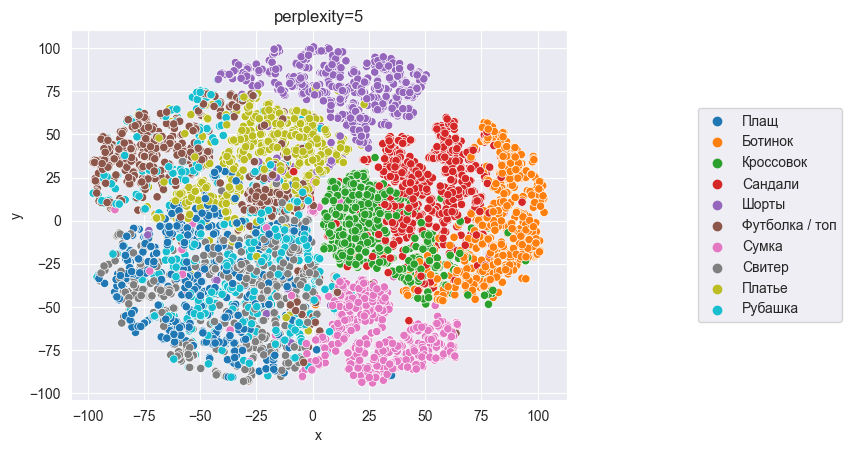

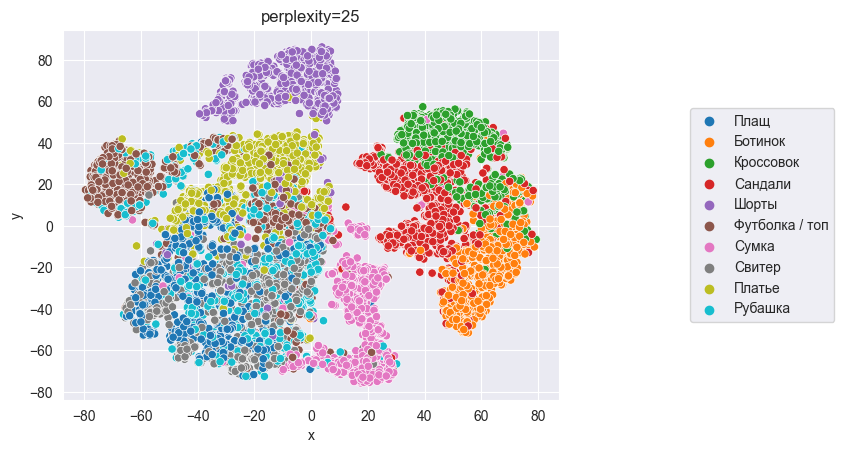

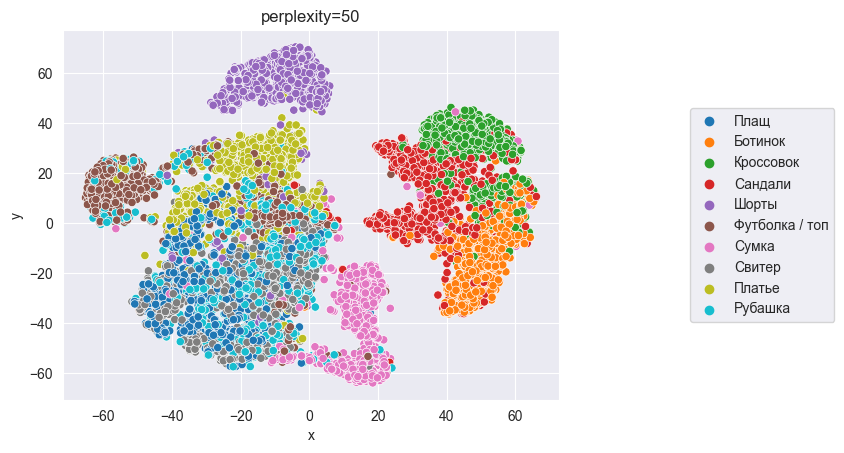

In [28]:
draw_plot(5)
draw_plot(25)
draw_plot(50)

In [29]:
import umap

In [30]:
def umap_preproc(neighbors: int, min_dist: float):
    umap_ = umap.UMAP(n_neighbors=neighbors, min_dist=min_dist, random_state=123)
    return pd.DataFrame(umap_.fit_transform(data_reshaped))

In [31]:
n_n = (5, 25, 50)
m_d = (0.1, 0.6)
um = dict()
for i in range(len(n_n)):
    for j in range(len(m_d)):
        um[(n_n[i], m_d[j])] = pd.DataFrame(umap.UMAP(n_neighbors=n_n[i], min_dist=m_d[j], random_state=123).fit_transform(data_reshaped))

In [40]:
def draw_plot_umap(umap_features: pd.DataFrame, key: tuple):
    plt_data = data_reshaped.copy()
    plt_data['x'] = umap_features[0]
    plt_data['y'] = umap_features[1]
    fig, ax = plt.subplots()
    ax.set_title(f'neighbours={key[0]}, dist={key[1]}')

    g = sns.scatterplot(x='x', y='y', hue=labels, data=plt_data)
    g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

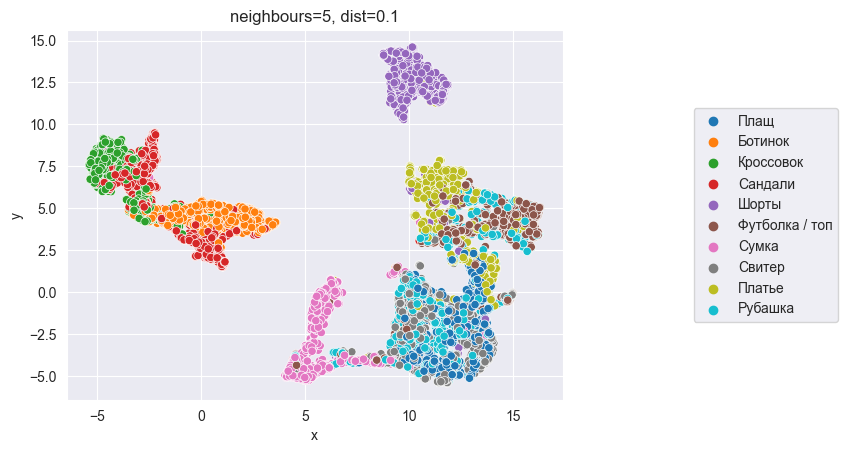

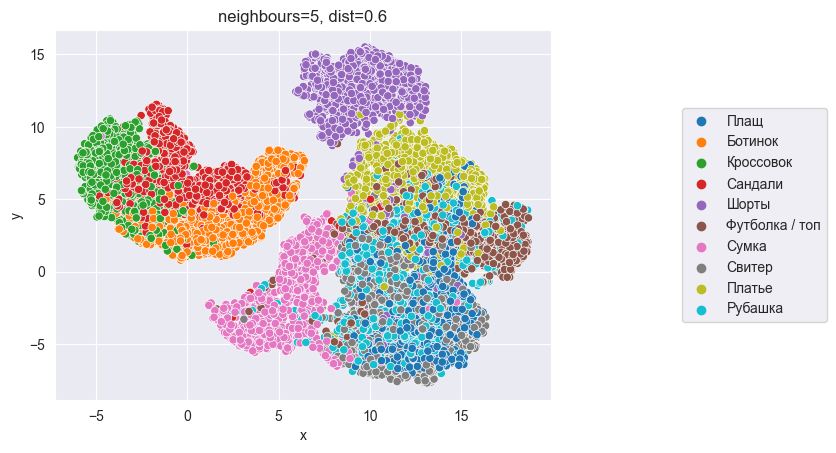

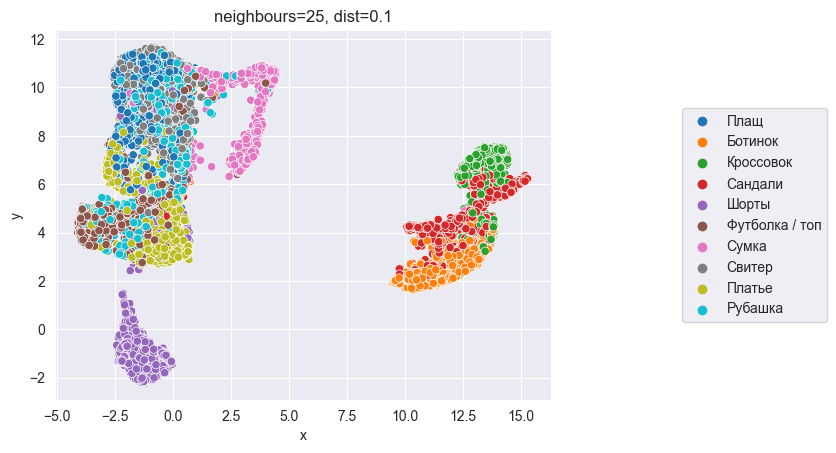

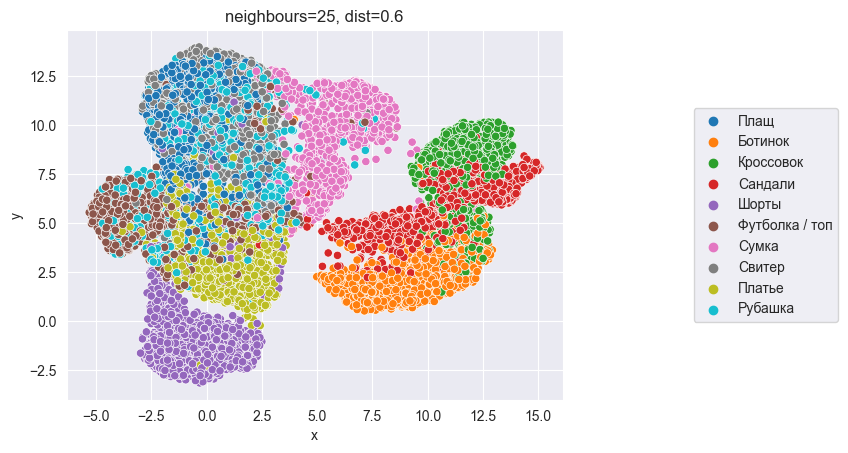

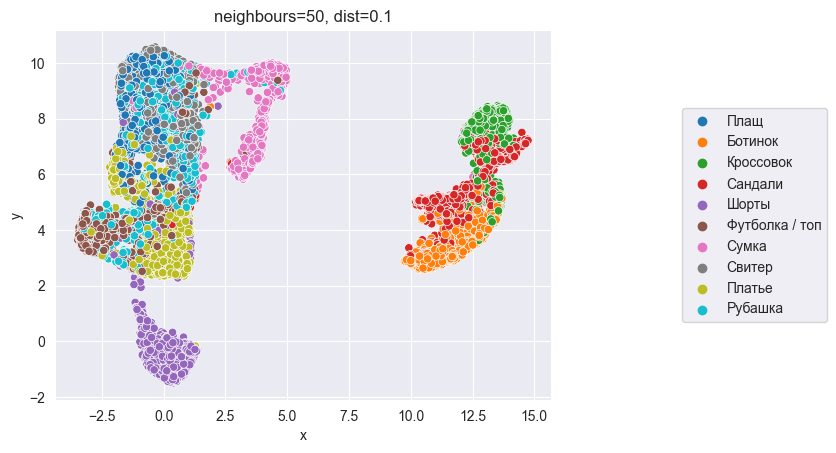

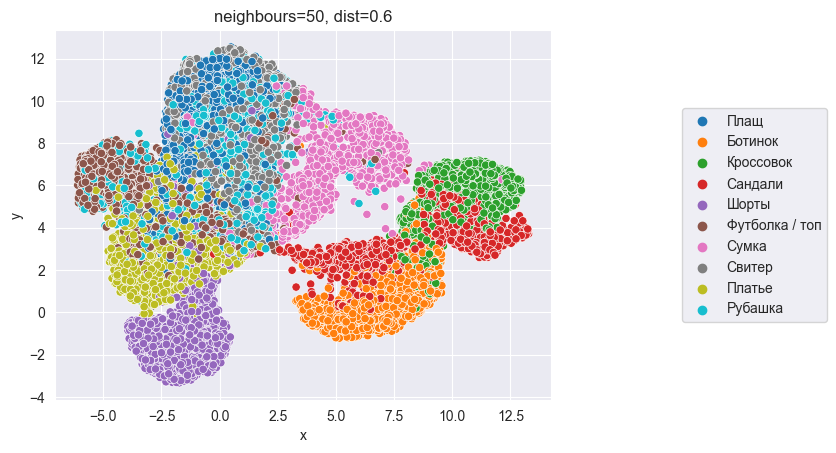

In [41]:
for key in um:
    draw_plot_umap(um[key], key)

In [34]:
print('время работы umap')
%timeit -r 1 -n 1 umap_preproc(5, 0.1)

время работы umap
12.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [35]:
print('время работы t-sne')
%timeit -r 1 -n 1 t_sne_preproc(5)

время работы t-sne
56.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
